# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [ ]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 9.0.1**: List three different real networks and state the nodes and links for each of them.

1) Facebook: Node=person, link=(Facebook)friendship

2) Spread of Coronavirus: Node=infected person, link=infection of coronavirus (spread of virus)

3) Power grids: Node=households, link=transmission lines 

> **Ex. 9.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

As many others (I imagine), I think that right now, a network of the spread of the Corona virus (see above) is the most interesting, especially due to understanding how to handle a similar situation in the future.

It is arguably very large and probably also difficult to get a full mapping of due to the large "dark numbers".

> **Ex. 9.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

Probably in terms of better understanding the interconnectivity to possible circumvent some of the downsides, i.e. vulnerabilities, due to large degrees of interconnectivity

> **Ex. 9.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

If you think of the WWW then each webpage will be a node and the hyperlinks its links. Each webpage can have numerous hyperlinks, L, but compared to the actual maximum number of possible links, L_max, it will still be much smaller, i.e. L<<L_max, implying that the network is sparse

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 9.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

In [ ]:
import networkx as nx
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3, 4, 9, 11])

# Add edges
G.add_edge(1, 2)
G.add_edge(1, 9)
G.add_edge(4, 1)
e = (2, 3)
G.add_edge(*e)

G.remove_node(11)

nx.draw(G)


> **Ex. 9.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

1) An ER network is a random (binomial) graph. It is created using the NetworkX package by specifying the number of notes, n, and probability of edge creation, p.

In [ ]:
# 2-3)
ER = nx.erdos_renyi_graph(100, 0.1, seed=None, directed=False)
nx.draw(ER)

In [ ]:
# 4) Degree distribution

import collections

degree_sequence = sorted([d for n, d in ER.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram, ER")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

> **Ex. 9.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

1) A BA network is based on an algorithm for generating random scale-free networks using a preferential attachment mechanism.  It is created using the NetworkX package by specifying the number of notes, n, and the number of edges to attach to attach from a new node to existing nodes, m.

In [ ]:
# 2-3)
BA=nx.barabasi_albert_graph(100, 2, seed=22)

nx.draw(BA)

In [ ]:
#4)
degree_sequence = sorted([d for n, d in BA.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram, BA")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

5) The interconnectedness is clearly higher for the ER network, as is obvious from both inspection of the network graps as well as the two degree distributions, where the ER network is, unsurorisingly given its link to the binomial distrubyion, while the BA is skewed.

6) It could also have been interesting to consider e.g. degree correlation and clustering

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [2]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

,user1,user2,timestamp
0,28,28,1095135831
1,1015,1017,1097725406
2,959,959,1098387569
3,991,991,1098425204
4,1015,1017,1098489762
5,1015,1017,1098673897
6,3368,3368,1098755376
7,14752,14736,1099526971
8,1015,1017,1099602800
9,1531,1080,1099889279


As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [3]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)


> **Ex: 9.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [4]:
def directedGraph(t0, t1):
    data_t = data.loc[data.timestamp.between(t0, t1)]
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')
    G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    return G_t

t0 = data.timestamp.max() - 86400 * 365  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

DG365 = directedGraph(t0, t1)

In [ ]:
# Number of edges
DG365.number_of_edges()

In [ ]:
# Number of nodes
DG365.number_of_nodes()

> **Ex: 9.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

In [ ]:
def degree_dist(degrees):
    degrees=sorted([d for n, d in degrees])
    counts= collections.Counter(degrees)
    degrees, counts=zip(*counts.items())
    return degrees, counts

In [ ]:
dgin, cntin=degree_dist(DG365.in_degree())
dgout, cnout=degree_dist(DG365.out_degree())

# Plot as scatter to avoid overlapping bars
plt.plot(dgin, cntin, "o", label="In-degree")
plt.plot(dgout, cnout, "o", label="Out-degree")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Density")
plt.title("Degree Plot")
plt.legend(loc="best")


> **Ex: 9.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

In [ ]:
cluster365= nx.clustering(DG365, nodes=None, weight="weight")

In [ ]:
import numpy as np

emin=sorted(set(cluster365.values()))[1]
emax=sorted(set(cluster365.values()))[-1]

ebins=np.logspace(np.log10(emin), np.log10(emax), 50)

fig, ax = plt.subplots()
plt.hist(cluster365.values(), bins=ebins)

plt.title("Clustering Histogram")
plt.ylabel("Distribution")
plt.xlabel("Log clustering")
plt.xscale("log")

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 9.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [24]:
#Create smaller dataset
new_t0 = data.timestamp.max() - 86400 * 10 # Lower bound of time-slice (here: 10 days before last wall post)
new_t1 = data.timestamp.max()              # Upper bound of time-slice

DG_small = directedGraph(new_t0, new_t1)

#selected_nodes = [n for n,v in DG365.nodes(data=True) if v['timestamp'] == 'December 2008']  
#selected_edges = [(u,v) for u,v,e in DG365.edges(data=True) if e['timestamp'] == 'December 2008']

In [25]:
DG_small.number_of_edges()

16809

In [26]:
DG_small.number_of_nodes()

13469

In [28]:
visualize(DG_small)

(None, None)

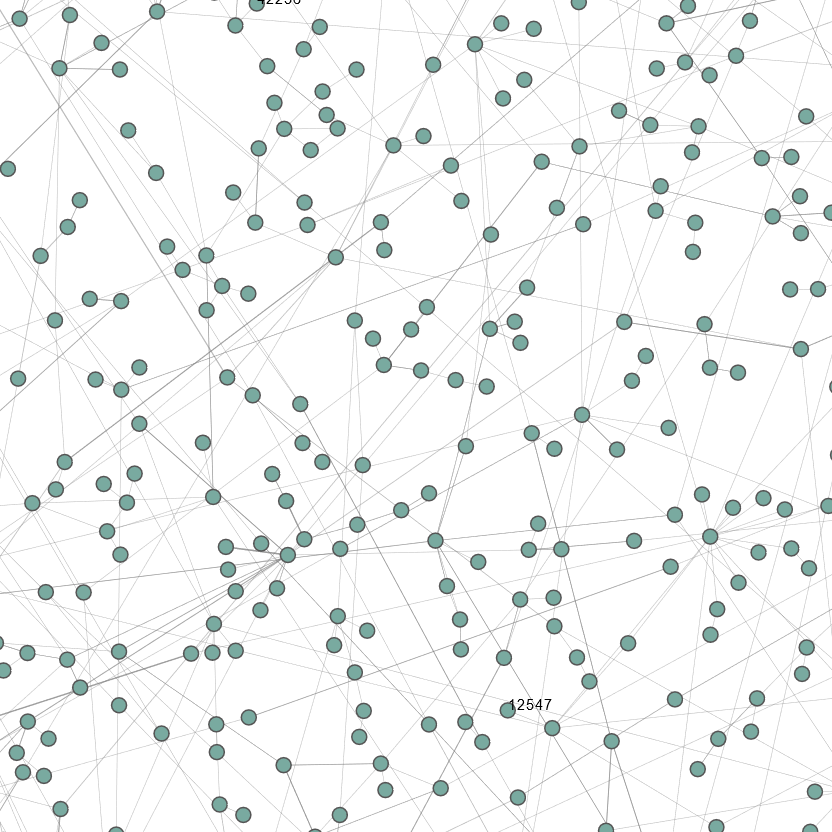

In [30]:
from IPython.display import Image
Image("network-1.png")

Looks kind of like a hairball so maybe I did something wrong...?